## **Electric Vehicle Population EDA**

**Objectives** :  Analyze the Electric Vehicle (EV) dataset to uncover patterns, trends, and insights into EV sales and market. \
**Dataset** : Data collected from [data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)
For more information about the dataset, referse to the [README file](../data/README.md).

#### **Import Neccessory modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from camel_converter import to_snake

from dotenv import load_dotenv
load_dotenv()

import os
PROJECT_DIR = os.getenv("PROJECT_DIR")

# data cleaning helper scirpt 
import sys
sys.path.append(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/scripts")
import visualizing as vis_helper

#### **Getting Start**

##### read dataset

In [2]:
df = pd.read_csv(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/data/ev_population.csv")

##### dataset lookup

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [5]:
print(f"Dataframe contain {df.shape[0]} rows & {df.shape[1]} columns")

Dataframe contain 205439 rows & 17 columns


In [43]:
df.head()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_utility
0,Kitsap,Seabeck,WA,2023,TOYOTA,RAV4 PRIME,PHEV,Eligible,PUGET SOUND ENERGY INC
1,Kitsap,Bremerton,WA,2018,NISSAN,LEAF,BEV,Eligible,PUGET SOUND ENERGY INC
2,King,Seattle,WA,2020,TESLA,MODEL 3,BEV,Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Seattle,WA,2014,NISSAN,LEAF,BEV,Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Thurston,Yelm,WA,2017,CHEVROLET,BOLT EV,BEV,Eligible,PUGET SOUND ENERGY INC


#### **Data cleaning**

##### Drop unwanted columns

In [8]:
df.sample()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
116077,KNDCR3LF8P,Snohomish,Snohomish,WA,98290.0,2023,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,39.0,220491631,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10


In [9]:
unwanted_cols = ["VIN (1-10)", "DOL Vehicle ID", "2020 Census Tract", "Legislative District", "Postal Code", \
                 "Vehicle Location"]
# new df without unwanted columns
df = df.drop(columns=unwanted_cols, axis=1)

In [10]:
df.sample()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
28212,Snohomish,Snohomish,WA,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,PUGET SOUND ENERGY INC


##### Drop duplicated rows

In [11]:
duplicate_df = df.duplicated()
print(f"The dataframe contain {df[duplicate_df].shape[0]} duplicated rows")
# even though when we remove this much no.of rows it will strongly reduce our dataset but...

df = df[~duplicate_df]

The dataframe contain 167254 duplicated rows


In [12]:
df.shape

(38185, 11)

##### Rename column names

In [13]:
map_cols = {
    "Electric Vehicle Type" : "type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility" : "cafv eligibility"}

# replace large column names with meaningfull names
df = df.rename(columns=map_cols)

In [14]:
# change all column name into snake_case format
df.columns = [to_snake("_".join(each.lower().split(" "))) for each in df.columns]

In [15]:
df.sample()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_range,base_msrp,electric_utility
53324,Thurston,Olympia,WA,2022,AUDI,Q5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,PUGET SOUND ENERGY INC


##### Handle invalid data points

In [16]:
for each in df.columns:
    print(each)
    print(df[each].unique())
    print("*" * 100)

county
['Kitsap' 'King' 'Thurston' 'Snohomish' 'Yakima' 'Island' 'Skagit'
 'Spokane' 'Clallam' 'Chelan' 'Walla Walla' 'Kittitas' 'Whitman' 'Stevens'
 'Grant' 'Douglas' 'Clark' 'Cowlitz' 'Jefferson' 'Klickitat' 'Pierce'
 'Franklin' 'Whatcom' 'San Juan' 'Columbia' 'Grays Harbor' 'Lewis'
 'Benton' 'Pacific' 'Mason' 'Platte' 'Monterey' 'Wahkiakum' 'Norfolk'
 'Okanogan' 'Cumberland' 'Skamania' "Prince George's" 'Garfield'
 'Pend Oreille' 'Asotin' 'Lincoln' 'Adams' 'San Diego' 'Oldham' 'York'
 'Orange' 'Wake' 'Los Angeles' 'Sonoma' 'Ferry' 'Churchill' 'DeKalb'
 'Goochland' 'Stafford' 'Contra Costa' 'Riverside' 'Loudoun' 'Allen'
 'James City' 'Anne Arundel' 'Madison' 'Isle of Wight' 'Leavenworth'
 'Charles' 'Sarpy' 'Kings' 'Ventura' 'San Mateo' 'Sacramento' 'Maui' nan
 'Ada' 'Mobile' 'District of Columbia' 'New York' 'Multnomah' 'Fairfax'
 'Wichita' 'El Paso' 'Honolulu' 'Maricopa' 'Montgomery' 'Hillsborough'
 'Doña Ana' 'Autauga' 'Berkeley' 'Escambia' 'Polk' 'Charleston' 'Hamilton'
 'Mercer' 

In [17]:
df['base_msrp'] = df['base_msrp'].replace({0 : np.nan})
df['electric_range'] = df['electric_range'].replace({0 : np.nan})

In [18]:
cafv_map = {
    "Eligibility unknown as battery range has not been researched" : "Unknown",
    "Clean Alternative Fuel Vehicle Eligible" : "Eligible",
    "Not eligible due to low battery range" : "Not Eligible"
}

df['cafv_eligibility'] = df['cafv_eligibility'].replace(cafv_map)
df['cafv_eligibility'].value_counts()

cafv_eligibility
Eligible        15640
Unknown         14659
Not Eligible     7886
Name: count, dtype: int64

In [19]:
type_map = {
    "Battery Electric Vehicle (BEV)" : "BEV",
    "Plug-in Hybrid Electric Vehicle (PHEV)" : "PHEV"
}
df['type'] = df['type'].replace(type_map)
df['type'].value_counts()

type
BEV     23630
PHEV    14555
Name: count, dtype: int64

In [20]:
df.head()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_range,base_msrp,electric_utility
0,Kitsap,Seabeck,WA,2023,TOYOTA,RAV4 PRIME,PHEV,Eligible,42.0,NaN,PUGET SOUND ENERGY INC
1,Kitsap,Bremerton,WA,2018,NISSAN,LEAF,BEV,Eligible,151.0,NaN,PUGET SOUND ENERGY INC
2,King,Seattle,WA,2020,TESLA,MODEL 3,BEV,Eligible,266.0,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Seattle,WA,2014,NISSAN,LEAF,BEV,Eligible,84.0,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Thurston,Yelm,WA,2017,CHEVROLET,BOLT EV,BEV,Eligible,238.0,NaN,PUGET SOUND ENERGY INC


##### Handle Null values

In [21]:
df.isna().mean() * 100     # columns percentage of missing values

county               0.007856
city                 0.007856
state                0.000000
model_year           0.000000
make                 0.000000
model                0.002619
type                 0.000000
cafv_eligibility     0.000000
electric_range      38.405133
base_msrp           96.579809
electric_utility     0.007856
dtype: float64

In [22]:
df = df.drop(columns=["base_msrp", "electric_range"])    
# drop columns which have large null values,
# we lost 2 important varibales, we dont have another option here
# when we try to impute the null values it change the data

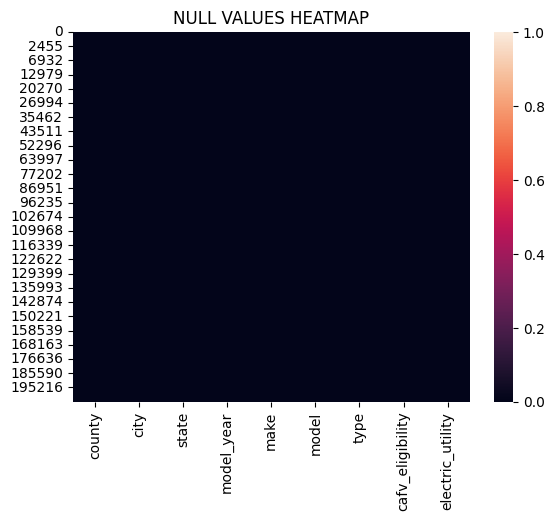

In [23]:
plt.title("NULL VALUES HEATMAP")
sns.heatmap(data=df.isna())
plt.show()

- there is very small size of missing values, so we can drop it

In [24]:
df = df.dropna(how="any", axis=0)    # it remove entire rows when it contain any of NaN values

In [25]:
df.isna().sum()

county              0
city                0
state               0
model_year          0
make                0
model               0
type                0
cafv_eligibility    0
electric_utility    0
dtype: int64

In [26]:
df.shape

(38181, 9)

##### Confirm Data-Type

In [27]:
df.dtypes

county              object
city                object
state               object
model_year           int64
make                object
model               object
type                object
cafv_eligibility    object
electric_utility    object
dtype: object

#### **Alias**

**cafv** &nbsp; &nbsp; &nbsp;=&nbsp; Clean Alternative Fuel Vehicle \
**PHEV** &nbsp; &nbsp;=&nbsp; Plug-In Hybrid Elevtric Vehicle \
**BEV** &nbsp; &nbsp; &nbsp; =&nbsp; Battery Elecrtic Vehicle

#### **Exploratory Data Analysis**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38181 entries, 0 to 205436
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   county            38181 non-null  object
 1   city              38181 non-null  object
 2   state             38181 non-null  object
 3   model_year        38181 non-null  int64 
 4   make              38181 non-null  object
 5   model             38181 non-null  object
 6   type              38181 non-null  object
 7   cafv_eligibility  38181 non-null  object
 8   electric_utility  38181 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.9+ MB


In [39]:
df.shape

(38181, 9)

In [40]:
df.describe()

,model_year
count,38181.000000
mean,2020.307273
std,3.351767
min,1997.000000
25%,2018.000000
50%,2021.000000
75%,2023.000000
max,2025.000000


In [42]:
df.describe(include="O").T

,count,unique,top,freq
county,38181,205,King,9926
city,38181,770,Seattle,845
state,38181,43,WA,37751
make,38181,42,TESLA,7381
model,38181,152,MODEL 3,2333
type,38181,2,BEV,23628
cafv_eligibility,38181,3,Eligible,15638
electric_utility,38181,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),10395


In [28]:
numerical_columns = df.select_dtypes(include=np.number).columns
catagorical_columns = df.select_dtypes(include="object").columns

##### **Catagorical Features**

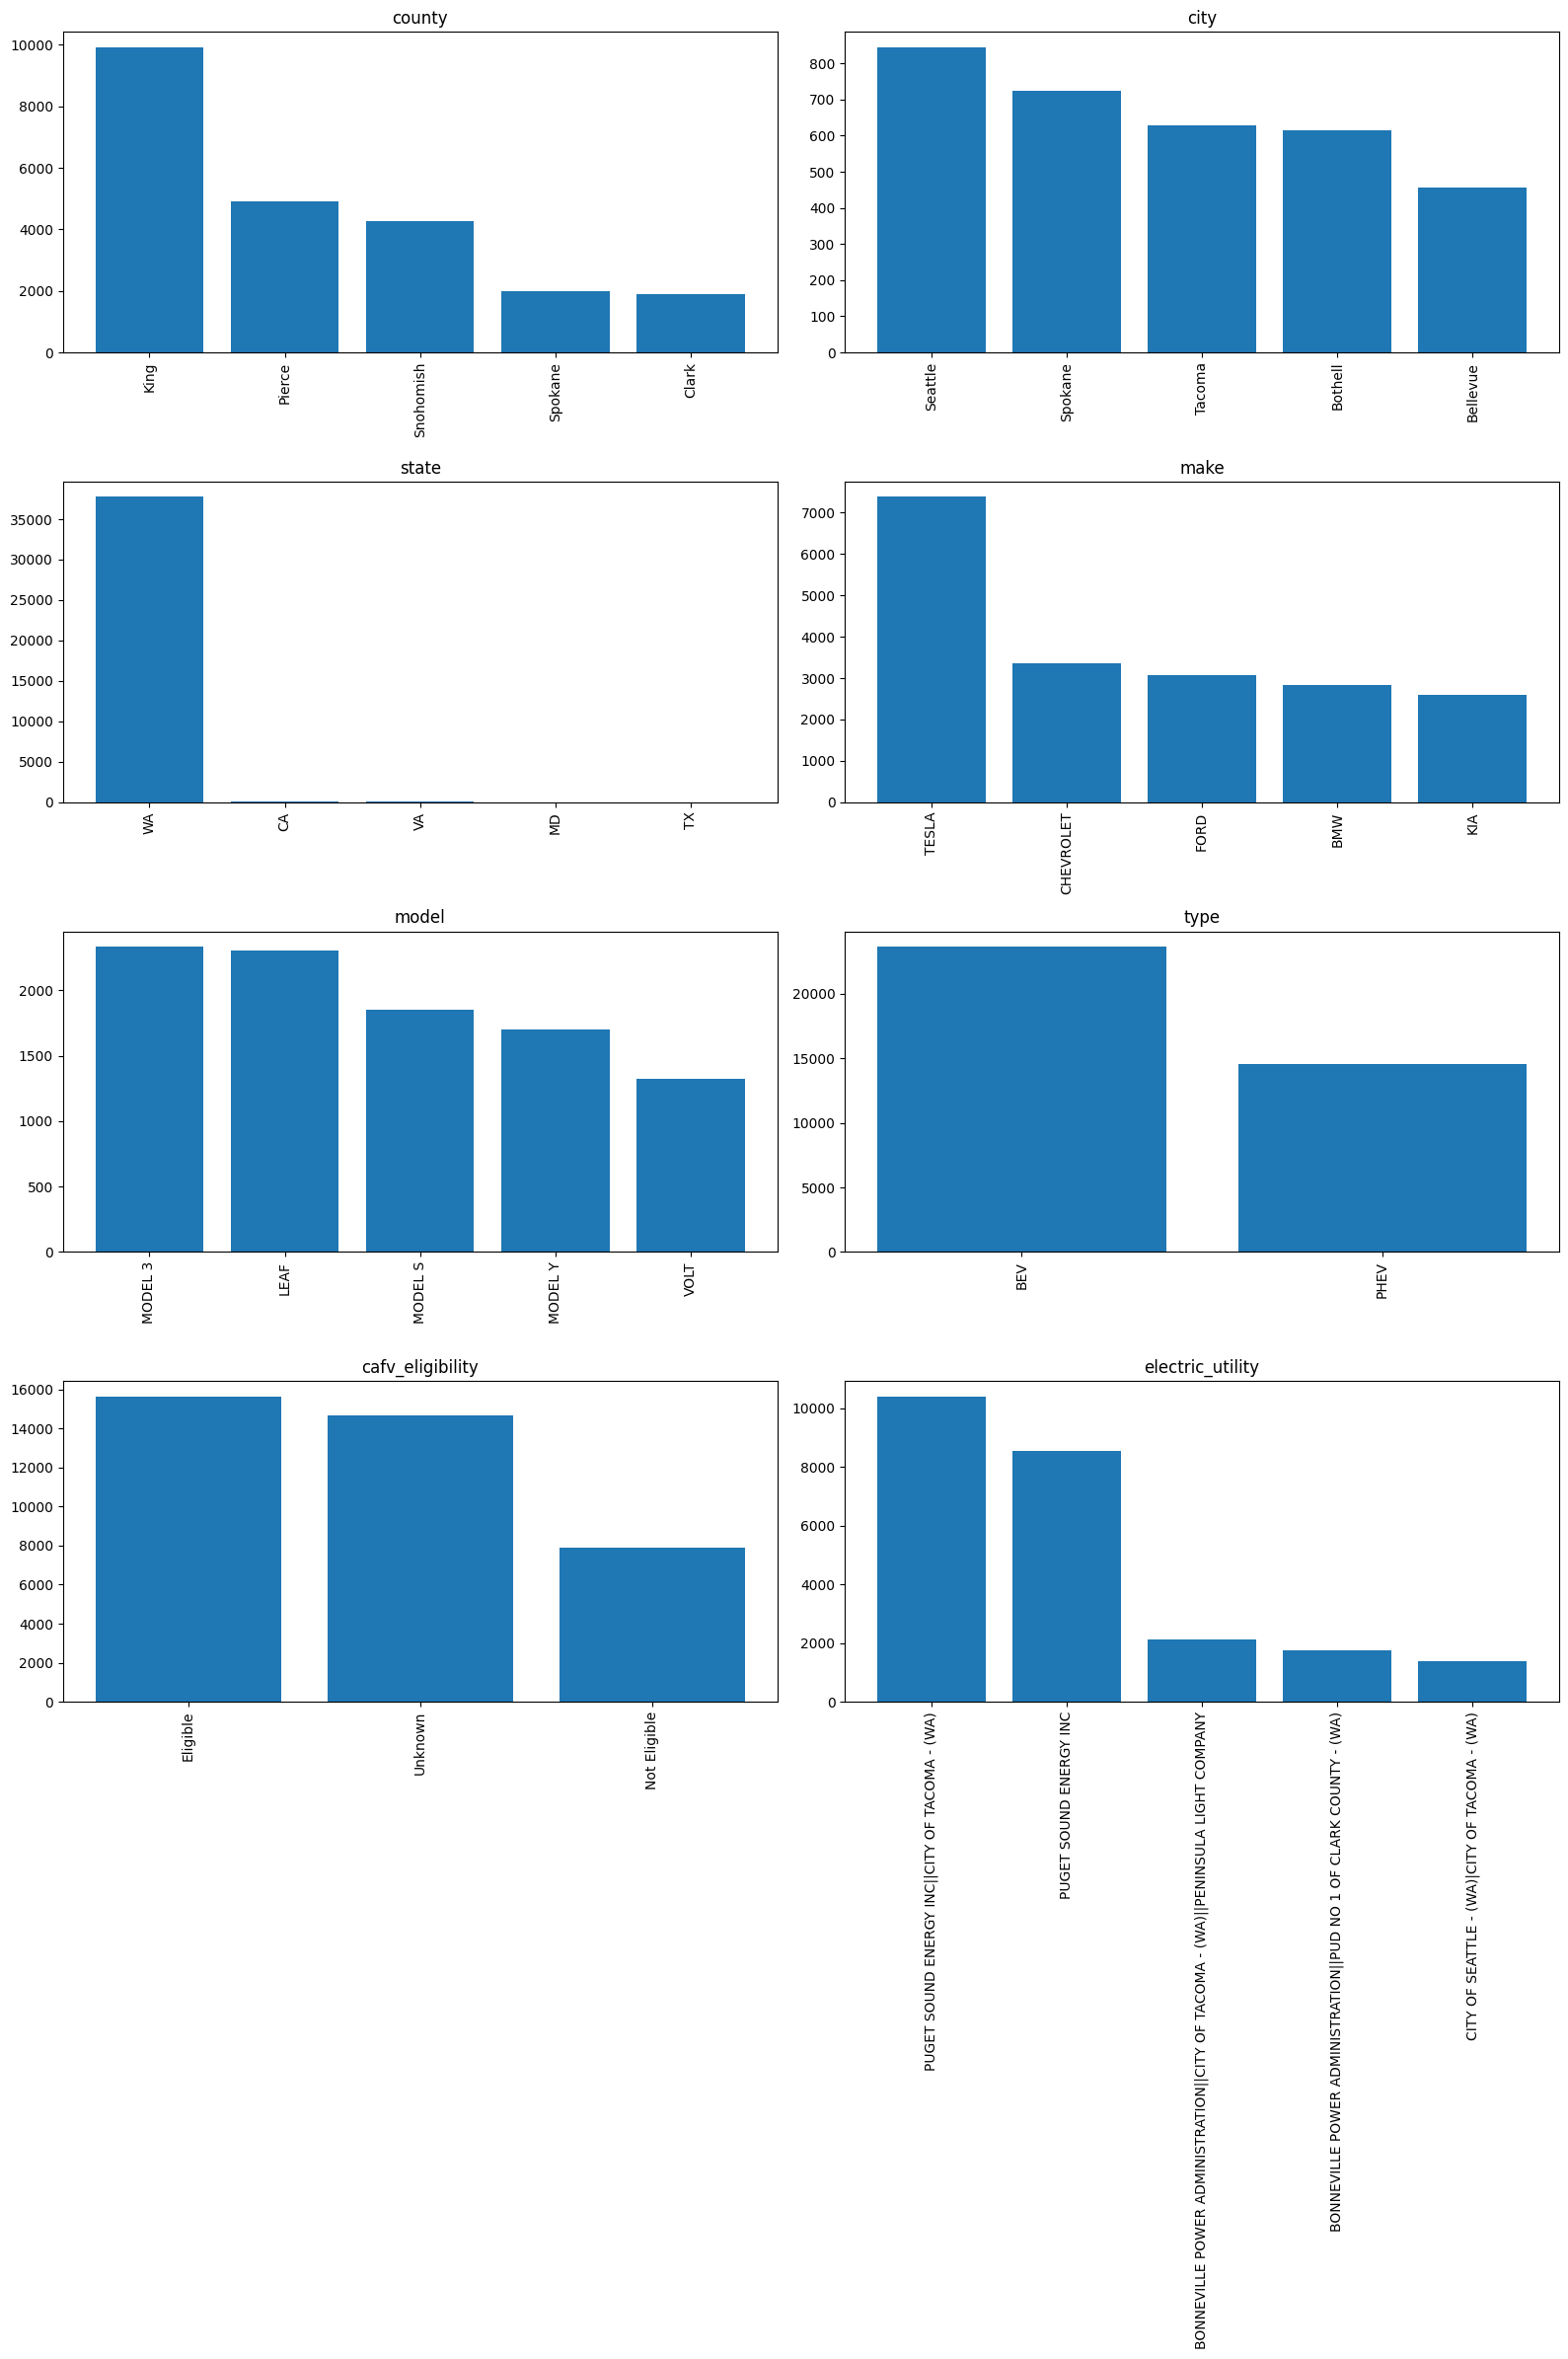

In [29]:
plt.figure(figsize=(16,24))
vis_helper.plot_catagorical(df, columns=catagorical_columns)
plt.tight_layout()
plt.show()

##### **Numerical Feature**

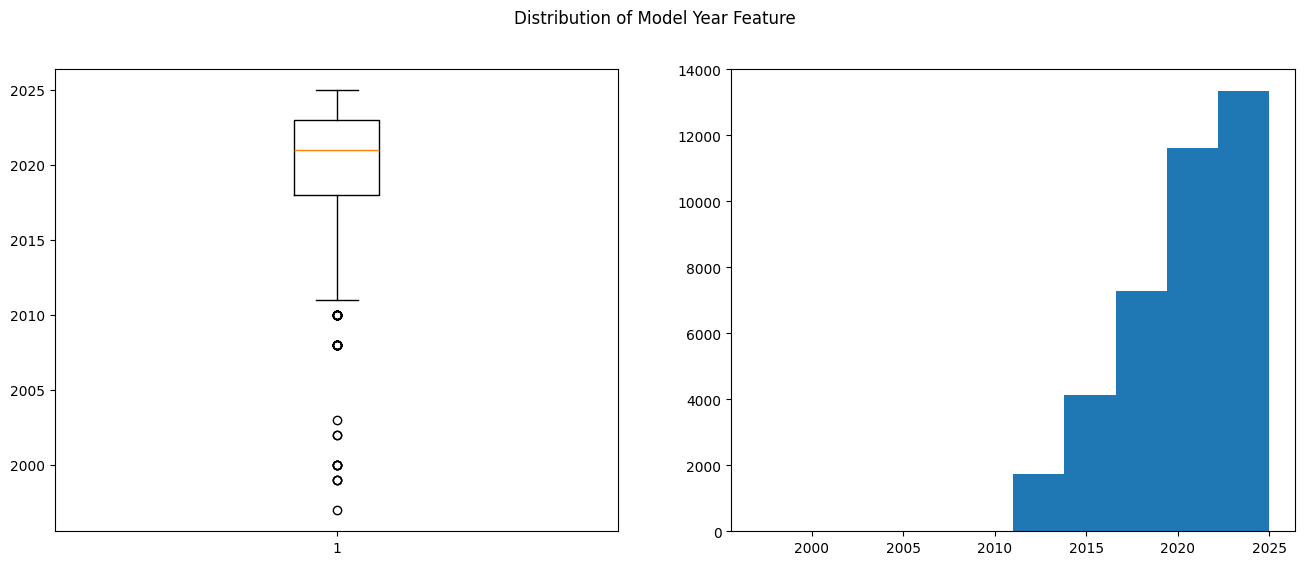

In [30]:
plt.figure(figsize=(16,6))

plt.suptitle("Distribution of Model Year Feature")
plt.subplot(1,2, 1)
plt.boxplot(df[numerical_columns])

plt.subplot(1,2,2)
plt.hist(df[numerical_columns])

plt.show()

##### **Exploration**

**Key Questions to Explore:**
1. Top Makers Cars moslty register in which county, city, State
2. What types of vehicles are more common (e.g., sedan, SUV, truck)?
3. What percentage of EVs are CAFV-eligible?
4. Is there an increase in EV adoption over recent years?
5. Ev type and locality as any hidden relationship

### **1. Top Makers Ev's moslty register in which county, city, State**

In [31]:
df[df['make'] == "ACURA"]

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_utility
2150,King,Bellevue,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
17963,King,Newcastle,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
52668,Thurston,Centralia,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC
55886,Pierce,Gig Harbor,WA,2024,ACURA,ZDX,BEV,Unknown,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
58593,King,Redmond,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
75811,Snohomish,Everett,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC
87049,King,Seattle,WA,2024,ACURA,ZDX,BEV,Unknown,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
107897,Snohomish,Monroe,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC
117055,King,Tukwila,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
118635,King,Renton,WA,2024,ACURA,ZDX,BEV,Unknown,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
